In [25]:
import numpy as np
import pandas as pd
import re

In [26]:
cars_df = pd.read_csv('data/Cardetails-2.csv')
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [27]:
cars_df.shape

(8128, 13)

In [28]:

def createParts(nModel: str, nPart: int):
    items = nModel.split(maxsplit=2)
    return items[nPart]

cars_df['brand'] = cars_df['name'].apply((lambda x: createParts(x, 0)))
cars_df['model'] = cars_df['name'].apply((lambda x: createParts(x, 1)))
cars_df['model_variants'] = cars_df['name'].apply((lambda x: createParts(x, 2)))


In [29]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model,model_variants
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift,Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid,1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City,2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20,Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift,VXI BSIII


In [30]:
cars_df.dropna(axis=0, inplace=True)
nl = cars_df.isnull().sum()
nl

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
brand             0
model             0
model_variants    0
dtype: int64

In [31]:
nl = cars_df.isna().sum()
nl

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
brand             0
model             0
model_variants    0
dtype: int64

In [32]:
def dup_summary(df):
  
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])

    summ['Duplicated Rows'] = df.duplicated().sum()
    summ['Count'] = df.count().values
    summ['Duplicated Rows %'] = ((df.duplicated().sum()) / len(df))*100
 
    display(summ)

dup_summary(cars_df)

,Data Type,Duplicated Rows,Count,Duplicated Rows %
name,object,1189,7906,15.039211
year,int64,1189,7906,15.039211
selling_price,int64,1189,7906,15.039211
km_driven,int64,1189,7906,15.039211
fuel,object,1189,7906,15.039211
seller_type,object,1189,7906,15.039211
transmission,object,1189,7906,15.039211
owner,object,1189,7906,15.039211
mileage,object,1189,7906,15.039211
engine,object,1189,7906,15.039211


In [33]:
# Lets check where is these duplicated values?

duplicated_rows = cars_df[cars_df.duplicated()]
duplicated_indexes = duplicated_rows.index

print("Indexes of duplicated rows:")
print(duplicated_indexes)

Indexes of duplicated rows:
Index([ 291,  296,  370,  371,  372,  387,  409,  410,  411,  412,
       ...
       7982, 7983, 7984, 7985, 7986, 7987, 7988, 8117, 8126, 8127],
      dtype='int64', length=1189)


In [34]:
# Drop duplicated values

cars_df = cars_df.drop_duplicates()
cars_df.reset_index(drop=True, inplace=True)

dup_summary(cars_df)

,Data Type,Duplicated Rows,Count,Duplicated Rows %
name,object,0,6717,0.0
year,int64,0,6717,0.0
selling_price,int64,0,6717,0.0
km_driven,int64,0,6717,0.0
fuel,object,0,6717,0.0
seller_type,object,0,6717,0.0
transmission,object,0,6717,0.0
owner,object,0,6717,0.0
mileage,object,0,6717,0.0
engine,object,0,6717,0.0


In [35]:
cars_df.shape

(6717, 16)

In [36]:
#
cars_df['max_power'] = cars_df['max_power'].apply((lambda x: x.split(' ', maxsplit=1)[0]))
cars_df.rename(columns={'max_power': 'max_power_bhp'}, inplace=True)
#
cars_df['mileage'] = cars_df['mileage'].apply((lambda x: x.split(maxsplit=1)[0]))
cars_df.rename(columns={'mileage': 'mileage_kmpl'}, inplace=True)
#
cars_df['engine'] = cars_df['engine'].apply((lambda x: x.split(maxsplit=1)[0]))
cars_df.rename(columns={'engine': 'engine_cc'}, inplace=True)


In [37]:
#
cars_df.drop(columns='torque', axis=1, inplace=True)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6717 non-null   object 
 1   year            6717 non-null   int64  
 2   selling_price   6717 non-null   int64  
 3   km_driven       6717 non-null   int64  
 4   fuel            6717 non-null   object 
 5   seller_type     6717 non-null   object 
 6   transmission    6717 non-null   object 
 7   owner           6717 non-null   object 
 8   mileage_kmpl    6717 non-null   object 
 9   engine_cc       6717 non-null   object 
 10  max_power_bhp   6717 non-null   object 
 11  seats           6717 non-null   float64
 12  brand           6717 non-null   object 
 13  model           6717 non-null   object 
 14  model_variants  6717 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 787.3+ KB


In [38]:

cols_to_change_type = ['mileage_kmpl', 'engine_cc', 'max_power_bhp']
#
for col in cols_to_change_type:
    cars_df[col] = pd.to_numeric(cars_df[col])

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6717 non-null   object 
 1   year            6717 non-null   int64  
 2   selling_price   6717 non-null   int64  
 3   km_driven       6717 non-null   int64  
 4   fuel            6717 non-null   object 
 5   seller_type     6717 non-null   object 
 6   transmission    6717 non-null   object 
 7   owner           6717 non-null   object 
 8   mileage_kmpl    6717 non-null   float64
 9   engine_cc       6717 non-null   int64  
 10  max_power_bhp   6717 non-null   float64
 11  seats           6717 non-null   float64
 12  brand           6717 non-null   object 
 13  model           6717 non-null   object 
 14  model_variants  6717 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 787.3+ KB


In [39]:
print('mileage unique size ', len(cars_df.mileage_kmpl.unique()))
print('seats unique size ', len(cars_df.seats.unique()))

mileage unique size  381
seats unique size  9


BHP or brake horsepower is usually used as a more realistic measurement as it considers the power left over after the gearbox, alternator and water pump are working as well as any loss of power due to friction. PS or PferdStarke is the metric measure of horsepower. It is the equivalent of 98.6% of one HP.

In [40]:
print('max_power_bhp unique size ', len(cars_df.max_power_bhp.unique()))
print('max ', cars_df.max_power_bhp.max())
print('min ', cars_df.max_power_bhp.min())
print('mileage unique size ', len(cars_df.mileage_kmpl .unique()))
print('seats unique size ', len(cars_df.seats.unique()))
print('engine unique size ', len(cars_df.engine_cc.unique()))
print('owner unique size ', len(cars_df.owner.unique()))

print('brand unique size ', len(cars_df.brand.unique()))
print('model unique size ', len(cars_df.model.unique()))
print('model_variants unique size ', len(cars_df.model_variants.unique()))

print('year unique size ', len(cars_df.year.unique()))
print('max ', cars_df.year.max())
print('min ', cars_df.year.min())




max_power_bhp unique size  318
max  400.0
min  32.8
mileage unique size  381
seats unique size  9
engine unique size  121
owner unique size  5
brand unique size  31
model unique size  197
model_variants unique size  1855
year unique size  27
max  2020
min  1994


In [41]:
from functools import reduce
import operator
import numpy as np

cars_df_types = np.ravel(cars_df.dtypes.to_list())
cars_df_types = [item.name for item in cars_df.dtypes if np.object_ == item.type]
cars_df_types


['object',
 'object',
 'object',
 'object',
 'object',
 'object',
 'object',
 'object']

In [42]:
cars_df.groupby('fuel').count()

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats,brand,model,model_variants
fuel,,,,,,,,,,,,,,
CNG,51,51,51,51,51,51,51,51,51,51,51,51,51,51
Diesel,3658,3658,3658,3658,3658,3658,3658,3658,3658,3658,3658,3658,3658,3658
LPG,35,35,35,35,35,35,35,35,35,35,35,35,35,35
Petrol,2973,2973,2973,2973,2973,2973,2973,2973,2973,2973,2973,2973,2973,2973


In [43]:
cars_df.isnull().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage_kmpl  engine_cc  max_power_bhp  seats  brand  model  model_variants
False  False  False          False      False  False        False         False  False         False      False          False  False  False  False             6717
Name: count, dtype: int64

In [44]:
nl[nl > 0]

Series([], dtype: int64)

In [45]:
cars_df.query("engine_cc.isnull()")['brand']

Series([], Name: brand, dtype: object)

### Key specifications of Maruti Suzuki Swift

https://auto.economictimes.indiatimes.com/cars/maruti-suzuki-swift/specs/vxi

In [46]:
vxi = ['23.2 kmpl', '1197 cc', '89 bhp', '113 Nm', '5.0']
zxi = ['23.2 kmpl', '1197 cc', '89 bhp', '113 Nm', '5.0']

Binning (process of dividing a continuous variable into a set of intervals or bins)

In [47]:
# binning km_driven
bins_nmb = (cars_df.km_driven.max() - cars_df.km_driven.min()) // 10000
km_bins = list()
km_labels = list()
for i in range(0, bins_nmb+1):
    km_bins.append(i * 10000)
    km_labels.append(str(i*10000) + ' km' + ' - ' + str((i+1)*10000) + ' km')
km_labels.pop()

cars_df['km_driven_bin'] = pd.cut(cars_df['km_driven'], bins=km_bins, labels=km_labels).astype(str)

# binning engine size
bins_nmb = (cars_df.engine_cc.max() - cars_df.engine_cc.min()) // 100
engine_bins = list()
engine_labels = list()
for i in range(0, bins_nmb+1):
    engine_bins.append(i * 100)
    engine_labels.append(str(i*100) + ' cc' + ' - ' + str((i+1)*100) + ' cc')
engine_labels.pop()
cars_df['engine_bin'] = pd.cut(cars_df['engine_cc'], bins=engine_bins, labels=engine_labels).astype(str)

# binning mileage
bins_nmb = (cars_df.mileage_kmpl.max() - cars_df.mileage_kmpl.min()) // 5
mileage_bins = list()
mileage_labels = list()
for i in range(0, int(bins_nmb+1)):
    mileage_bins.append(i * 5)
    mileage_labels.append(str(i*5) + ' kmpl' + ' - ' + str((i+1)*5) + ' kmpl')
mileage_labels.pop()
cars_df['mileage_bin'] = pd.cut(cars_df['mileage_kmpl'], bins=mileage_bins, labels=mileage_labels).astype(str)

# binning max_power
bins_nmb = (cars_df.max_power_bhp.max() - cars_df.max_power_bhp.min()) // 20
power_bins = list()
power_labels = list()
for i in range(0, int(bins_nmb+1)):
    power_bins.append(i * 20)
    power_labels.append(str(i*20) + ' bhp' + ' - ' + str((i+1)*20) + ' bhp')
power_labels.pop()
cars_df['max_power_bin'] = pd.cut(cars_df['max_power_bhp'], bins=power_bins, labels=power_labels).astype(str)

In [48]:
cars_df.isnull().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage_kmpl  engine_cc  max_power_bhp  seats  brand  model  model_variants  km_driven_bin  engine_bin  mileage_bin  max_power_bin
False  False  False          False      False  False        False         False  False         False      False          False  False  False  False           False          False       False        False            6717
Name: count, dtype: int64

In [49]:
cars_df.isna().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage_kmpl  engine_cc  max_power_bhp  seats  brand  model  model_variants  km_driven_bin  engine_bin  mileage_bin  max_power_bin
False  False  False          False      False  False        False         False  False         False      False          False  False  False  False           False          False       False        False            6717
Name: count, dtype: int64

Save the dataset

In [50]:
cars_df.km_driven_bin.unique().tolist()

['140000 km - 150000 km',
 '110000 km - 120000 km',
 '130000 km - 140000 km',
 '120000 km - 130000 km',
 '40000 km - 50000 km',
 '170000 km - 180000 km',
 '0 km - 10000 km',
 '80000 km - 90000 km',
 '160000 km - 170000 km',
 '60000 km - 70000 km',
 '90000 km - 100000 km',
 '30000 km - 40000 km',
 '50000 km - 60000 km',
 '70000 km - 80000 km',
 '20000 km - 30000 km',
 '10000 km - 20000 km',
 '150000 km - 160000 km',
 '100000 km - 110000 km',
 '180000 km - 190000 km',
 '190000 km - 200000 km',
 '200000 km - 210000 km',
 '230000 km - 240000 km',
 '210000 km - 220000 km',
 '260000 km - 270000 km',
 '240000 km - 250000 km',
 '220000 km - 230000 km',
 '290000 km - 300000 km',
 '360000 km - 370000 km',
 '330000 km - 340000 km',
 '1490000 km - 1500000 km',
 '370000 km - 380000 km',
 '250000 km - 260000 km',
 'nan',
 '570000 km - 580000 km',
 '490000 km - 500000 km',
 '320000 km - 330000 km',
 '300000 km - 310000 km',
 '280000 km - 290000 km',
 '470000 km - 480000 km',
 '430000 km - 440000 km',

In [51]:
for item in cars_df.engine_bin.unique().tolist():
    if type(item) == str:
        print(type(item))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [52]:
cars_df.to_csv('data/cars_after_eda.csv', index=False)

In [53]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats,brand,model,model_variants,km_driven_bin,engine_bin,mileage_bin,max_power_bin
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti,Swift,Dzire VDI,140000 km - 150000 km,1200 cc - 1300 cc,20 kmpl - 25 kmpl,60 bhp - 80 bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid,1.5 TDI Ambition,110000 km - 120000 km,1400 cc - 1500 cc,20 kmpl - 25 kmpl,100 bhp - 120 bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda,City,2017-2020 EXi,130000 km - 140000 km,1400 cc - 1500 cc,15 kmpl - 20 kmpl,60 bhp - 80 bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai,i20,Sportz Diesel,120000 km - 130000 km,1300 cc - 1400 cc,20 kmpl - 25 kmpl,80 bhp - 100 bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti,Swift,VXI BSIII,110000 km - 120000 km,1200 cc - 1300 cc,15 kmpl - 20 kmpl,80 bhp - 100 bhp


In [54]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6717 non-null   object 
 1   year            6717 non-null   int64  
 2   selling_price   6717 non-null   int64  
 3   km_driven       6717 non-null   int64  
 4   fuel            6717 non-null   object 
 5   seller_type     6717 non-null   object 
 6   transmission    6717 non-null   object 
 7   owner           6717 non-null   object 
 8   mileage_kmpl    6717 non-null   float64
 9   engine_cc       6717 non-null   int64  
 10  max_power_bhp   6717 non-null   float64
 11  seats           6717 non-null   float64
 12  brand           6717 non-null   object 
 13  model           6717 non-null   object 
 14  model_variants  6717 non-null   object 
 15  km_driven_bin   6717 non-null   object 
 16  engine_bin      6717 non-null   object 
 17  mileage_bin     6717 non-null   o

In [187]:
x = 1997
cars_df.query('year == @x')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats,brand,model,model_variants
2424,Maruti 800 DX,1997,60000,25000,Petrol,Individual,Manual,Third Owner,16.1,796,37.0,4.0,Maruti,800,DX
5411,Maruti 800 Std,1997,50000,110000,Petrol,Individual,Manual,Second Owner,16.1,796,37.0,4.0,Maruti,800,Std
5702,Maruti Zen LXI,1997,70000,100000,Petrol,Individual,Manual,Second Owner,17.3,993,60.0,5.0,Maruti,Zen,LXI
5714,Maruti 800 AC,1997,29999,80000,Petrol,Individual,Manual,Third Owner,16.1,796,37.0,4.0,Maruti,800,AC
5726,Maruti Esteem AX,1997,125000,94000,Petrol,Individual,Automatic,Fourth & Above Owner,15.9,1298,85.0,5.0,Maruti,Esteem,AX
6164,Maruti 800 AC,1997,50000,120000,Petrol,Individual,Manual,Second Owner,16.1,796,37.0,4.0,Maruti,800,AC
7218,Maruti 800 AC,1997,50000,60000,Petrol,Individual,Manual,Second Owner,16.1,796,37.0,4.0,Maruti,800,AC
8042,Maruti Gypsy King Soft Top,1997,300000,186388,Petrol,Individual,Manual,Second Owner,14.8,1298,80.0,8.0,Maruti,Gypsy,King Soft Top
8115,Maruti 800 AC,1997,40000,120000,Petrol,Individual,Manual,First Owner,16.1,796,37.0,4.0,Maruti,800,AC


In [322]:
cars_df.groupby('year')['selling_price'].sum()

year
1994        144000
1995         55000
1996         82000
1997        774999
1998        521000
1999       1077000
2000       1146914
2001        279000
2002       1971999
2003       3758198
2004       5579855
2005      10925499
2006      17387148
2007      30985433
2008      41317516
2009      52854989
2010     102753987
2011     183594976
2012     219301977
2013     307723967
2014     320338960
2015     462496959
2016     599471972
2017     899094968
2018     772295980
2019    1035982984
2020      65509997
Name: selling_price, dtype: int64

In [68]:
testdict = dict()
testdict['Extra gradient boosting'] ='1'
testdict['Random forest regression'] ='2'
testdict['BaggingRegressor'] ='3'
testdict['ExtraTreesRegressor'] ='4'

test = testdict.keys()
items = testdict.items()
for key, ind in testdict.keys():
    print(key, testdict[key])


ValueError: too many values to unpack (expected 2)

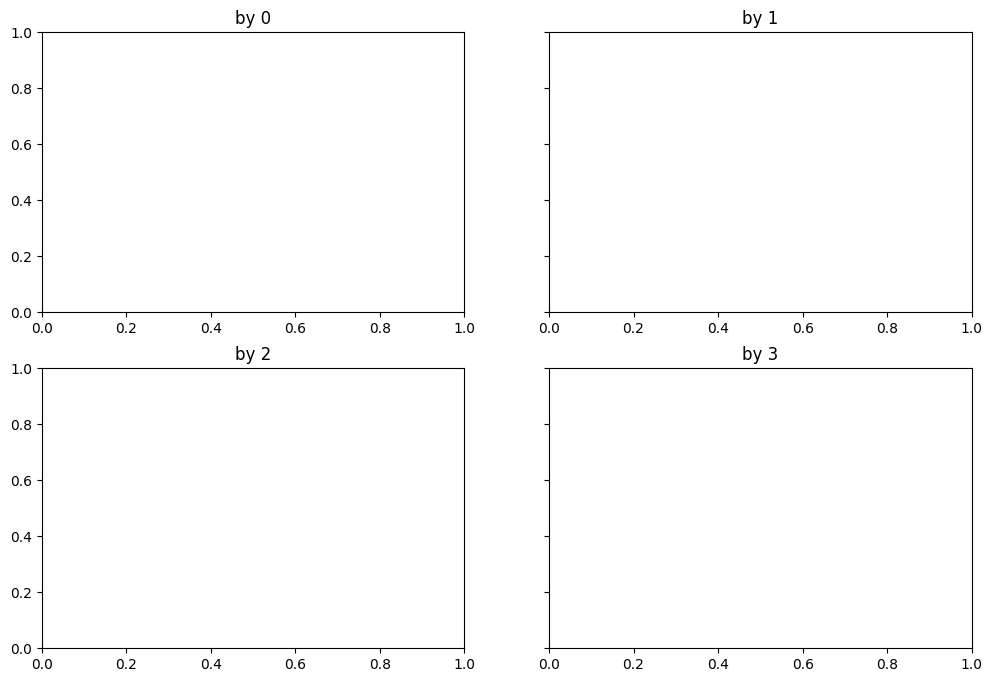

In [66]:
from matplotlib import pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axs_list = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
ind = 0
for cur_axs in axs_list:
    cur_axs.set_title("by " + str(ind))
    ind = ind + 1
#axs_list.reverse()
#print(axs_list.pop())